In [65]:
import numpy as np
import matplotlib.pyplot as plt

class Properties:
    
    def __init__(self, A=0, B=0, C=0):
        self.A = A
        self.B = B
        self.C = C
        
    def unpack(self):
        return self.A, self.B, self.C
    
def simulate(properties, initial_omega, T, N):
    
    A, B, C = properties.unpack()

    def f(t, omega):
        omega_dot_1 = omega[1]*omega[2] * (C-B)/A
        omega_dot_2 = omega[0]*omega[2] * (A-C)/B
        omega_dot_3 = omega[0]*omega[1] * (B-A)/C
        return np.array([omega_dot_1, omega_dot_2, omega_dot_3])
    
    omega = np.zeros((N, 3))
    omega[0] = initial_omega

    t = np.linspace(0, T, N)
    dt = T/(N-1)

    for n in range(N-1):
        k1 = f(t[n], omega[n])
        k2 = f(t[n] + dt/2, omega[n] + k1*dt/2)
        k3 = f(t[n] + dt/2, omega[n] + k2*dt/2)
        k4 = f(t[n] + dt, omega[n] + k3*dt)
        omega[n+1] = omega[n] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*dt
    
    return t, omega
    
def plot_simulation(t, omega, name=None):
    
    plt.figure(figsize=(7, 5))

    plt.plot(t, omega[:, 0], label=r'$\Omega_1$')
    plt.plot(t, omega[:, 1], label=r'$\Omega_2$')
    plt.plot(t, omega[:, 2], label=r'$\Omega_3$')
    plt.legend(fontsize=14)
    plt.xlabel('Time t (s)', fontsize=14)
    plt.ylabel(r'$\mathbf{\Omega}$ (rad/s)', fontsize=14)

    if name is not None:
        plt.savefig('../fig/{}'.format(name), bbox_inches='tight')
    plt.show()

# ABC, stable motion with constant angular velocity

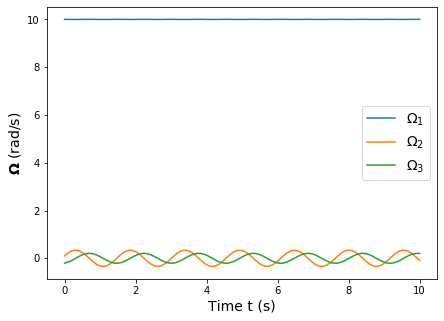

In [66]:
properties = Properties(100, 150, 200)
initial_omega = np.array([10, 0.1, -0.2])
T = 10
N = 100

t, omega = simulate(properties, initial_omega, T, N)

plot_simulation(t, omega, 'no_actuation_ABC_stable.png')

# ABC, unstable motion

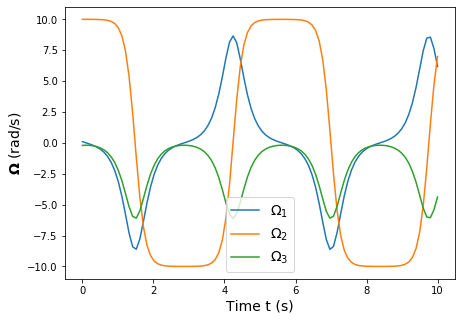

In [67]:
properties = Properties(100, 150, 200)
initial_omega = np.array([0.1, 10, -0.2])
T = 10
N = 100

t, omega = simulate(properties, initial_omega, T, N)

plot_simulation(t, omega, 'no_actuation_ABC_unstable.png')